In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



In [4]:
data = pd.read_csv('auto-mpg.csv',index_col='car name')

In [15]:
data.head()
print(data.index)
print(data.columns)

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=398)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')


In [16]:
data.shape

(398, 8)

In [17]:
data.isnull().any()


mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [18]:
data.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [19]:
data.horsepower.unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [20]:
data = data[data.horsepower != '?']


In [21]:
print('?' in data.horsepower)


False


In [22]:
data.shape


(392, 8)

In [24]:
data.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [25]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [26]:
data.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [27]:
data.mpg.describe()


count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

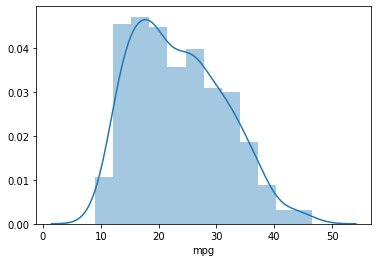

In [28]:
sns.distplot(data['mpg'])


In [29]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [30]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [31]:
data_scale = data.copy()

In [32]:
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [33]:
data_scale.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


In [34]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [35]:
data_scale.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


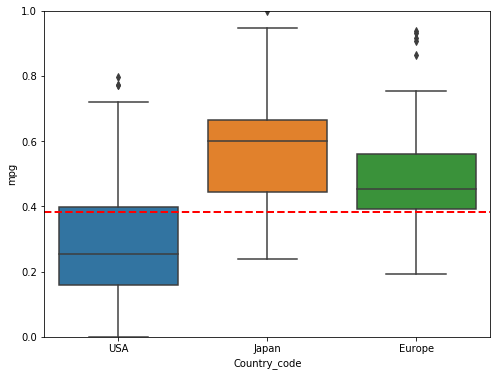

In [36]:
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

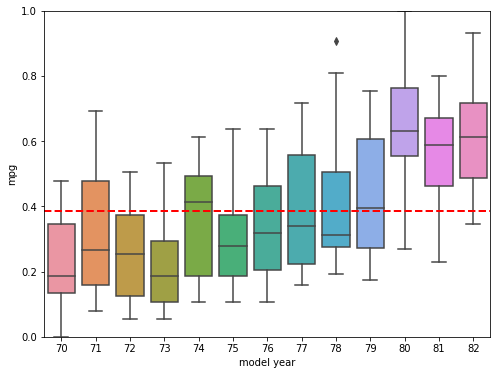

In [37]:
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)


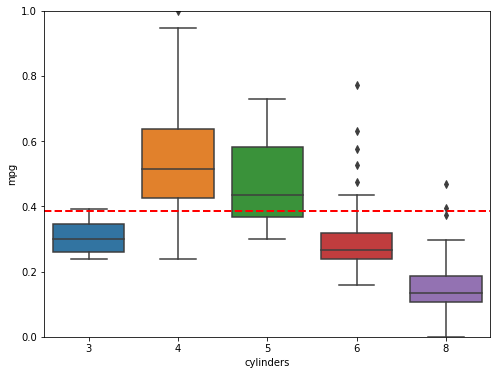

In [38]:
var = 'cylinders'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

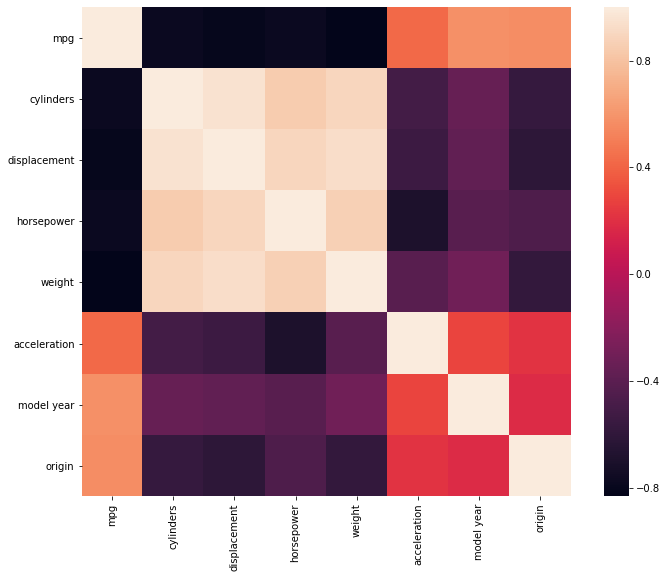

In [39]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

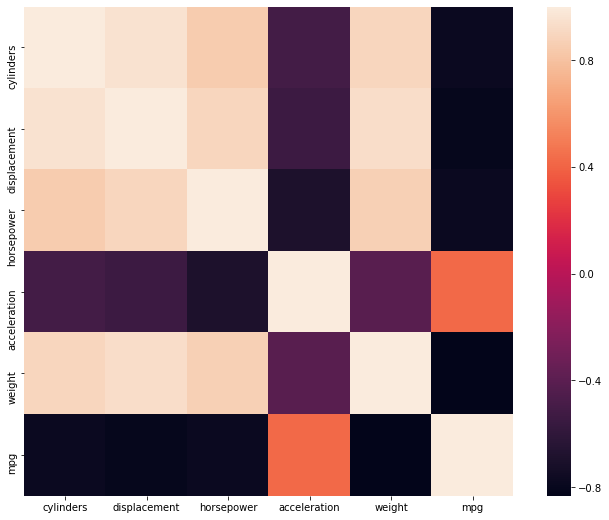

In [40]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = data[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

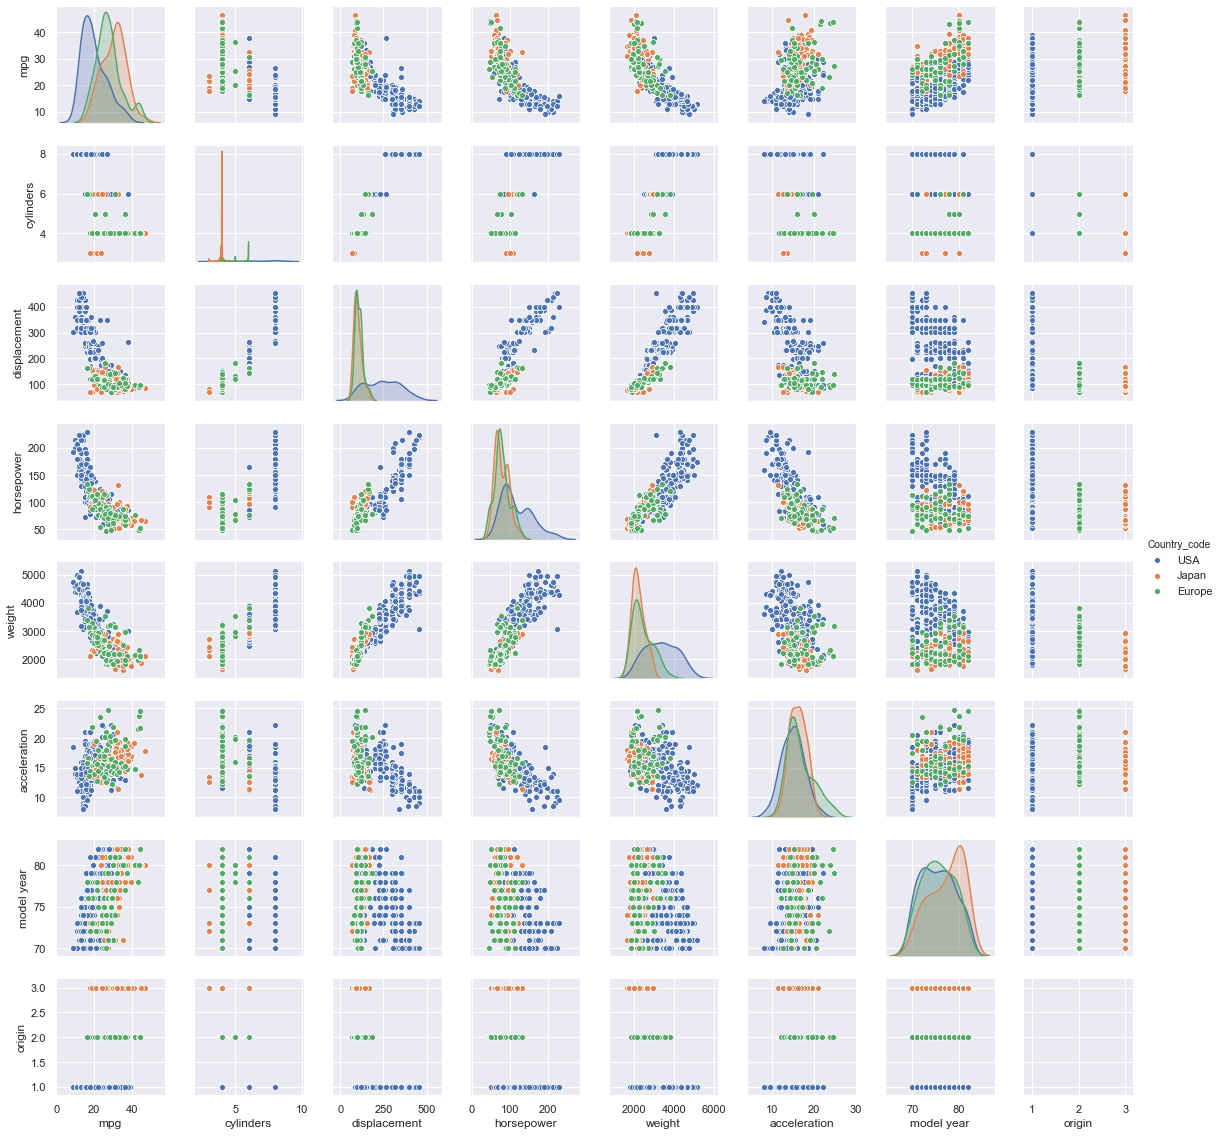

In [42]:
#scatterplot
sns.set()
sns.pairplot(data, size = 2.0,hue ='Country_code')
plt.show()


In [43]:
data.index


Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=392)

In [44]:
data[data.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')


Index(['subaru dlsubaru dl', 'subaru dlsubaru dl', 'subaru dlsubaru dl',
       'subaru dlsubaru dl'],
      dtype='object', name='car name')

In [45]:
data['Company_Name'] = data.index.str.extract('(^.*?)\s')


In [46]:
data['Company_Name'] = data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['Company_Name'] = data['Company_Name'].replace('maxda','mazda')
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
data['Company_Name'].fillna(value = 'subaru',inplace=True)  ## Strin methords will not work on null values so we use fillna()


In [2]:
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

NameError: name 'pd' is not defined

In [49]:
data.Company_Name.isnull().any()


False

In [50]:
var='mpg'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,1,USA,subaru


In [51]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,3,Japan,subaru


In [52]:
var='displacement'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
fiat 128,29.0,4,68.0,49.0,1867,19.5,73,2,Europe,subaru


In [53]:
data[data[var]== data[var].max()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru
buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,1,USA,subaru


In [54]:
var='horsepower'
data[data[var]== data[var].min()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,2,Europe,subaru
volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,73,2,Europe,subaru


In [55]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,subaru


In [56]:
var='weight'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,3,Japan,subaru


In [57]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac safari (sw),13.0,8,400.0,175.0,5140,12.0,71,1,USA,subaru


In [58]:
var='acceleration'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
plymouth 'cuda 340,14.0,8,340.0,160.0,3609,8.0,70,1,USA,subaru


In [59]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,2,Europe,subaru


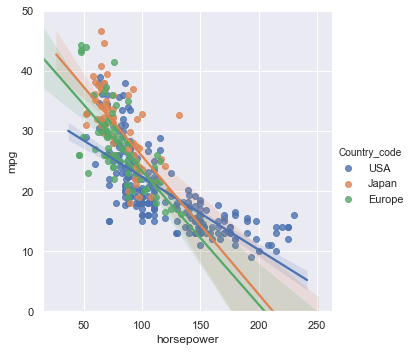

In [60]:
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

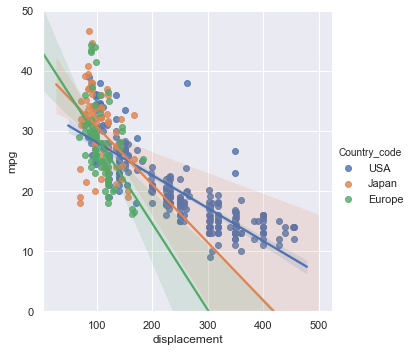

In [61]:
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

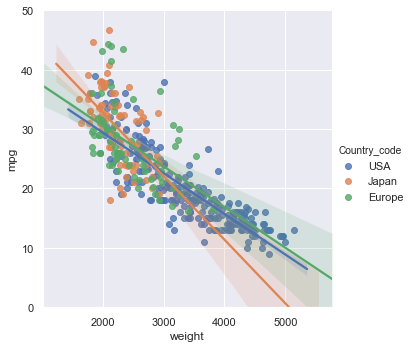

In [62]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

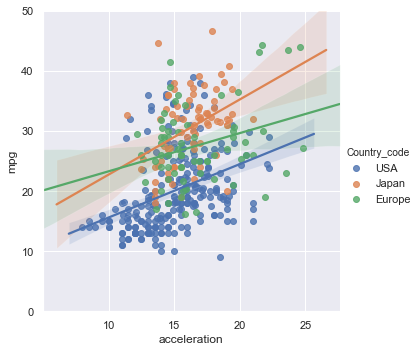

In [63]:
var = 'acceleration'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

In [64]:
data['Power_to_weight'] = ((data.horsepower*0.7457)/data.weight)

In [65]:
data.sort_values(by='Power_to_weight',ascending=False ).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru,0.054369
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,subaru,0.040091
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru,0.037917
bmw 2002,26.0,4,121.0,113.0,2234,12.5,70,2,Europe,subaru,0.037719
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,subaru,0.037679


In [66]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA,subaru,0.027666
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA,subaru,0.033317
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA,subaru,0.032554
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA,subaru,0.032582
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA,subaru,0.030269


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [68]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

In [69]:
X = StandardScaler().fit_transform(X)

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [71]:
regressor = LinearRegression()

In [72]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [73]:
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
y_predicted = regressor.predict(X_test)


In [75]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.486729614901561

In [76]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [77]:
gb_regressor.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [78]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [79]:
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.693397999711882

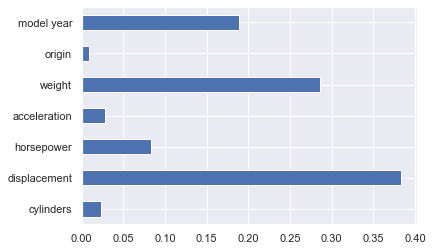

In [80]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components=2)

In [83]:
pca.fit(data[factors])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [84]:
pca.explained_variance_ratio_

array([0.99756151, 0.0020628 ])

In [85]:
pca1 = pca.components_[0]
pca2 = pca.components_[1]


In [86]:
transformed_data = pca.transform(data[factors])

In [88]:
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]

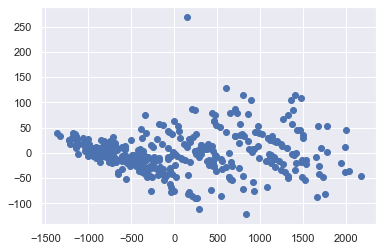

In [89]:
plt.scatter(pc1,pc2)

In [90]:
c = pca.inverse_transform(transformed_data[(transformed_data[:,0]>0 )& (transformed_data[:,1]>250)])


In [91]:
factors


['cylinders',
 'displacement',
 'horsepower',
 'acceleration',
 'weight',
 'origin',
 'model year']

In [92]:
c

array([[9.32016159e+00, 4.65727261e+02, 1.90441442e+02, 5.95699243e+00,
        3.08611199e+03, 6.23550659e-01, 6.93571097e+01]])

In [93]:
data[(data['model year'] == 70 )&( data.displacement>400)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,USA,subaru,0.034013
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,subaru,0.037679
plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,USA,subaru,0.037181
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru,0.037917
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru,0.054369


In [94]:
cv_sets = KFold(n_splits=10, shuffle= True,random_state=100)
params = {'n_estimators' : list(range(40,61)),
         'max_depth' : list(range(1,10)),
         'learning_rate' : [0.1,0.2,0.3] }
grid = GridSearchCV(gb_regressor, params,cv=cv_sets,n_jobs=4)

In [95]:
grid = grid.fit(X_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [96]:
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.3, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
gb_regressor_t = grid.best_estimator_

In [98]:
gb_regressor_t.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.3, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [99]:
y_predicted_gbr_t = gb_regressor_t.predict(X_test)


In [100]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr_t))
rmse

2.69624597402579

In [101]:
data.duplicated().any()


False